In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

import librosa
import librosa.display
import IPython.display

C:\Users\iseries\AppData\Local\Temp\ipykernel_6412\2982436820.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  ms.use('seaborn-muted')


In [15]:
import os
os.chdir("D:\Documents\GitHub\SCCpy2")

In [20]:
wav_pathname = "english.wav"

y, sr = librosa.load(wav_pathname)

C:\Users\iseries\AppData\Local\Temp\ipykernel_6412\2845669100.py:1: FutureWarning: Pass y=[-0.025786   -0.0335964  -0.03692939 ...  0.01357104  0.00915018
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\iseries\AppData\Local\Temp\ipykernel_6412\2845669100.py:3: FutureWarning: Pass ref=<function amax at 0x000002DB0DF940D0> as keyword args. From version 0.10 passing these as positional arguments will result in an error
  log_S = librosa.amplitude_to_db(S, np.max)


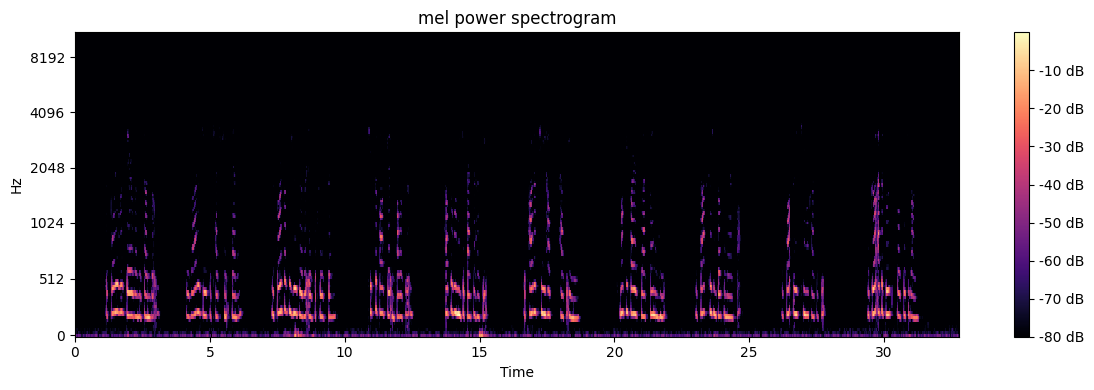

In [30]:
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

log_S = librosa.amplitude_to_db(S, np.max)

plt.figure(figsize=(12,4))

librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

plt.title('mel power spectrogram')

plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

In [24]:
## Examining Mel object

print (len(S))
print (len(S[0]))

128
1412


In [26]:

S_rot=np.rot90(S,3)

print (len(S_rot))
print (len(S_rot[0]))

1412
128


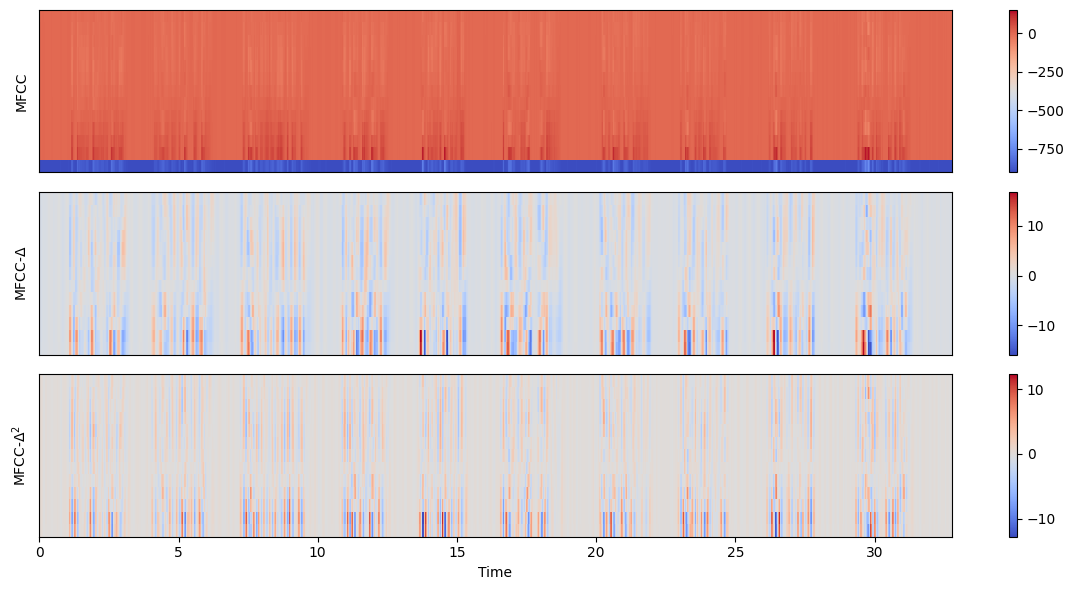

In [27]:
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Padding first and second deltas
delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

# We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

# Stacking these 3 tables together into one matrix
M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])

In [28]:
## Time test: Load WAV and extract 128 Mel coefficients

import time

start_time = time.time()

y, sr = librosa.load(wav_pathname)

mel_128=librosa.feature.mfcc(S=log_S, n_mfcc=128)

print("%s" % (time.time() - start_time)+" seconds")

1.386138916015625 seconds


In [29]:
## Time test: Load WAV and extract 13 Mel coefficients

import time

start_time = time.time()

y, sr = librosa.load(wav_pathname)

mel_13=librosa.feature.mfcc(S=log_S, n_mfcc=13)

print("%s" % (time.time() - start_time))

1.1003177165985107
